In [10]:
import datetime
import backtrader as bt
import backtrader.analyzers as btanalyzers
import matplotlib.pyplot as plt

from backtrader_plotting import Bokeh
%load_ext nb_black

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

In [43]:
names = ["VUSA", "A35", "S59", "VUSD", "BAB", "IWDA", "Z74", "ES3", "VWRD"]

# weights = [
#     0.170605,
#     0.065023,
#     0.004958,
#     0.027937,
#     0.357180,
#     0.281188,
#     0.013112,
#     0.036002,
#     0.043996,
# ]

weights = [
    0.08992020522,
    0.2744348384,
    0.03070927321,
    0.01896821775,
    0.06166520726,
    0.06204753154,
    0.02053451402,
    0.3393806347,
    0.102339578,
]
assets = list(map(lambda x: {"name": x, "data": f"data/{x}.csv"}, names))

# assets = [
#     {"name": "BAB", "data": "data/BAB.csv"},
#     {"name": "A35", "data": "data/A35.csv"},
# ]
# weights = [0.5, 0.5]

startDate = datetime.date.fromisoformat("2013-06-05")
endDate = datetime.date.fromisoformat("2019-06-13")

<IPython.core.display.Javascript object>

In [44]:
class TestStrategy(bt.Strategy):
    lastRebalanced = None
    params = (("rebalance", True), ("rebalancePeriod", 30))

    def rebalance(self):
        self.lastRebalanced = self.datetime.date()
        for i in range(len(weights)):
            self.order_target_percent(data=assets[i]["name"], target=weights[i])

    def next(self):
        if self.lastRebalanced == None:
            self.rebalance()
        elif (
            self.datetime.date() - self.lastRebalanced
        ).days > self.params.rebalancePeriod and self.params.rebalance:
            self.rebalance()

<IPython.core.display.Javascript object>

In [91]:
cerebro = bt.Cerebro()
cerebro.broker.setcash(100000.0)

cerebro.addstrategy(TestStrategy, rebalance=True)

cerebro.addanalyzer(btanalyzers.SharpeRatio, _name="sharpe")
cerebro.addanalyzer(btanalyzers.DrawDown, _name="drawdown")
cerebro.addanalyzer(btanalyzers.TimeDrawDown, _name="timedrawdown")
cerebro.addanalyzer(btanalyzers.PeriodStats, _name="periodstats")

print(f"Starting Portfolio Value: {cerebro.broker.getvalue()}")

for i in range(len(assets)):
    data = bt.feeds.YahooFinanceCSVData(
        dataname=assets[i]["data"], reverse=False, fromdate=startDate, todate=endDate
    )
    cerebro.adddata(data, name=assets[i]["name"])

results = cerebro.run()

print(f"Final Portfolio Value: {cerebro.broker.getvalue()}")

print("Sharpe Ratio:", results[0].analyzers.sharpe.get_analysis())
print("Drawdown:", results[0].analyzers.drawdown.get_analysis())
print("Time Drawdown:", results[0].analyzers.timedrawdown.get_analysis())
print("Period Stats:", results[0].analyzers.periodstats.get_analysis())

Starting Portfolio Value: 100000.0
Final Portfolio Value: 130901.00999999997
Sharpe Ratio: OrderedDict([('sharperatio', 0.5666814575020835)])
Drawdown: AutoOrderedDict([('len', 33), ('drawdown', 0.8276846965949342), ('moneydown', 1092.4900000000343), ('max', AutoOrderedDict([('len', 445), ('drawdown', 12.932834764504653), ('moneydown', 14846.280000000028)]))])
Time Drawdown: OrderedDict([('maxdrawdown', 12.932834764504653), ('maxdrawdownperiod', 445)])
Period Stats: OrderedDict([('average', 0.04063629859919265), ('stddev', 0.05406264523677307), ('positive', 5), ('negative', 2), ('nochange', 0), ('best', 0.1087003460392344), ('worst', -0.03732686167236543)])


<IPython.core.display.Javascript object>

In [92]:
dir(results[0].p)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_derive',
 '_get',
 '_getdefaults',
 '_getitems',
 '_getkeys',
 '_getkwargs',
 '_getkwargsdefault',
 '_getpairs',
 '_getpairsbase',
 '_getrecurse',
 '_gettuple',
 '_getvalues',
 'isdefault',
 'notdefault',
 'rebalance',
 'rebalancePeriod']

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


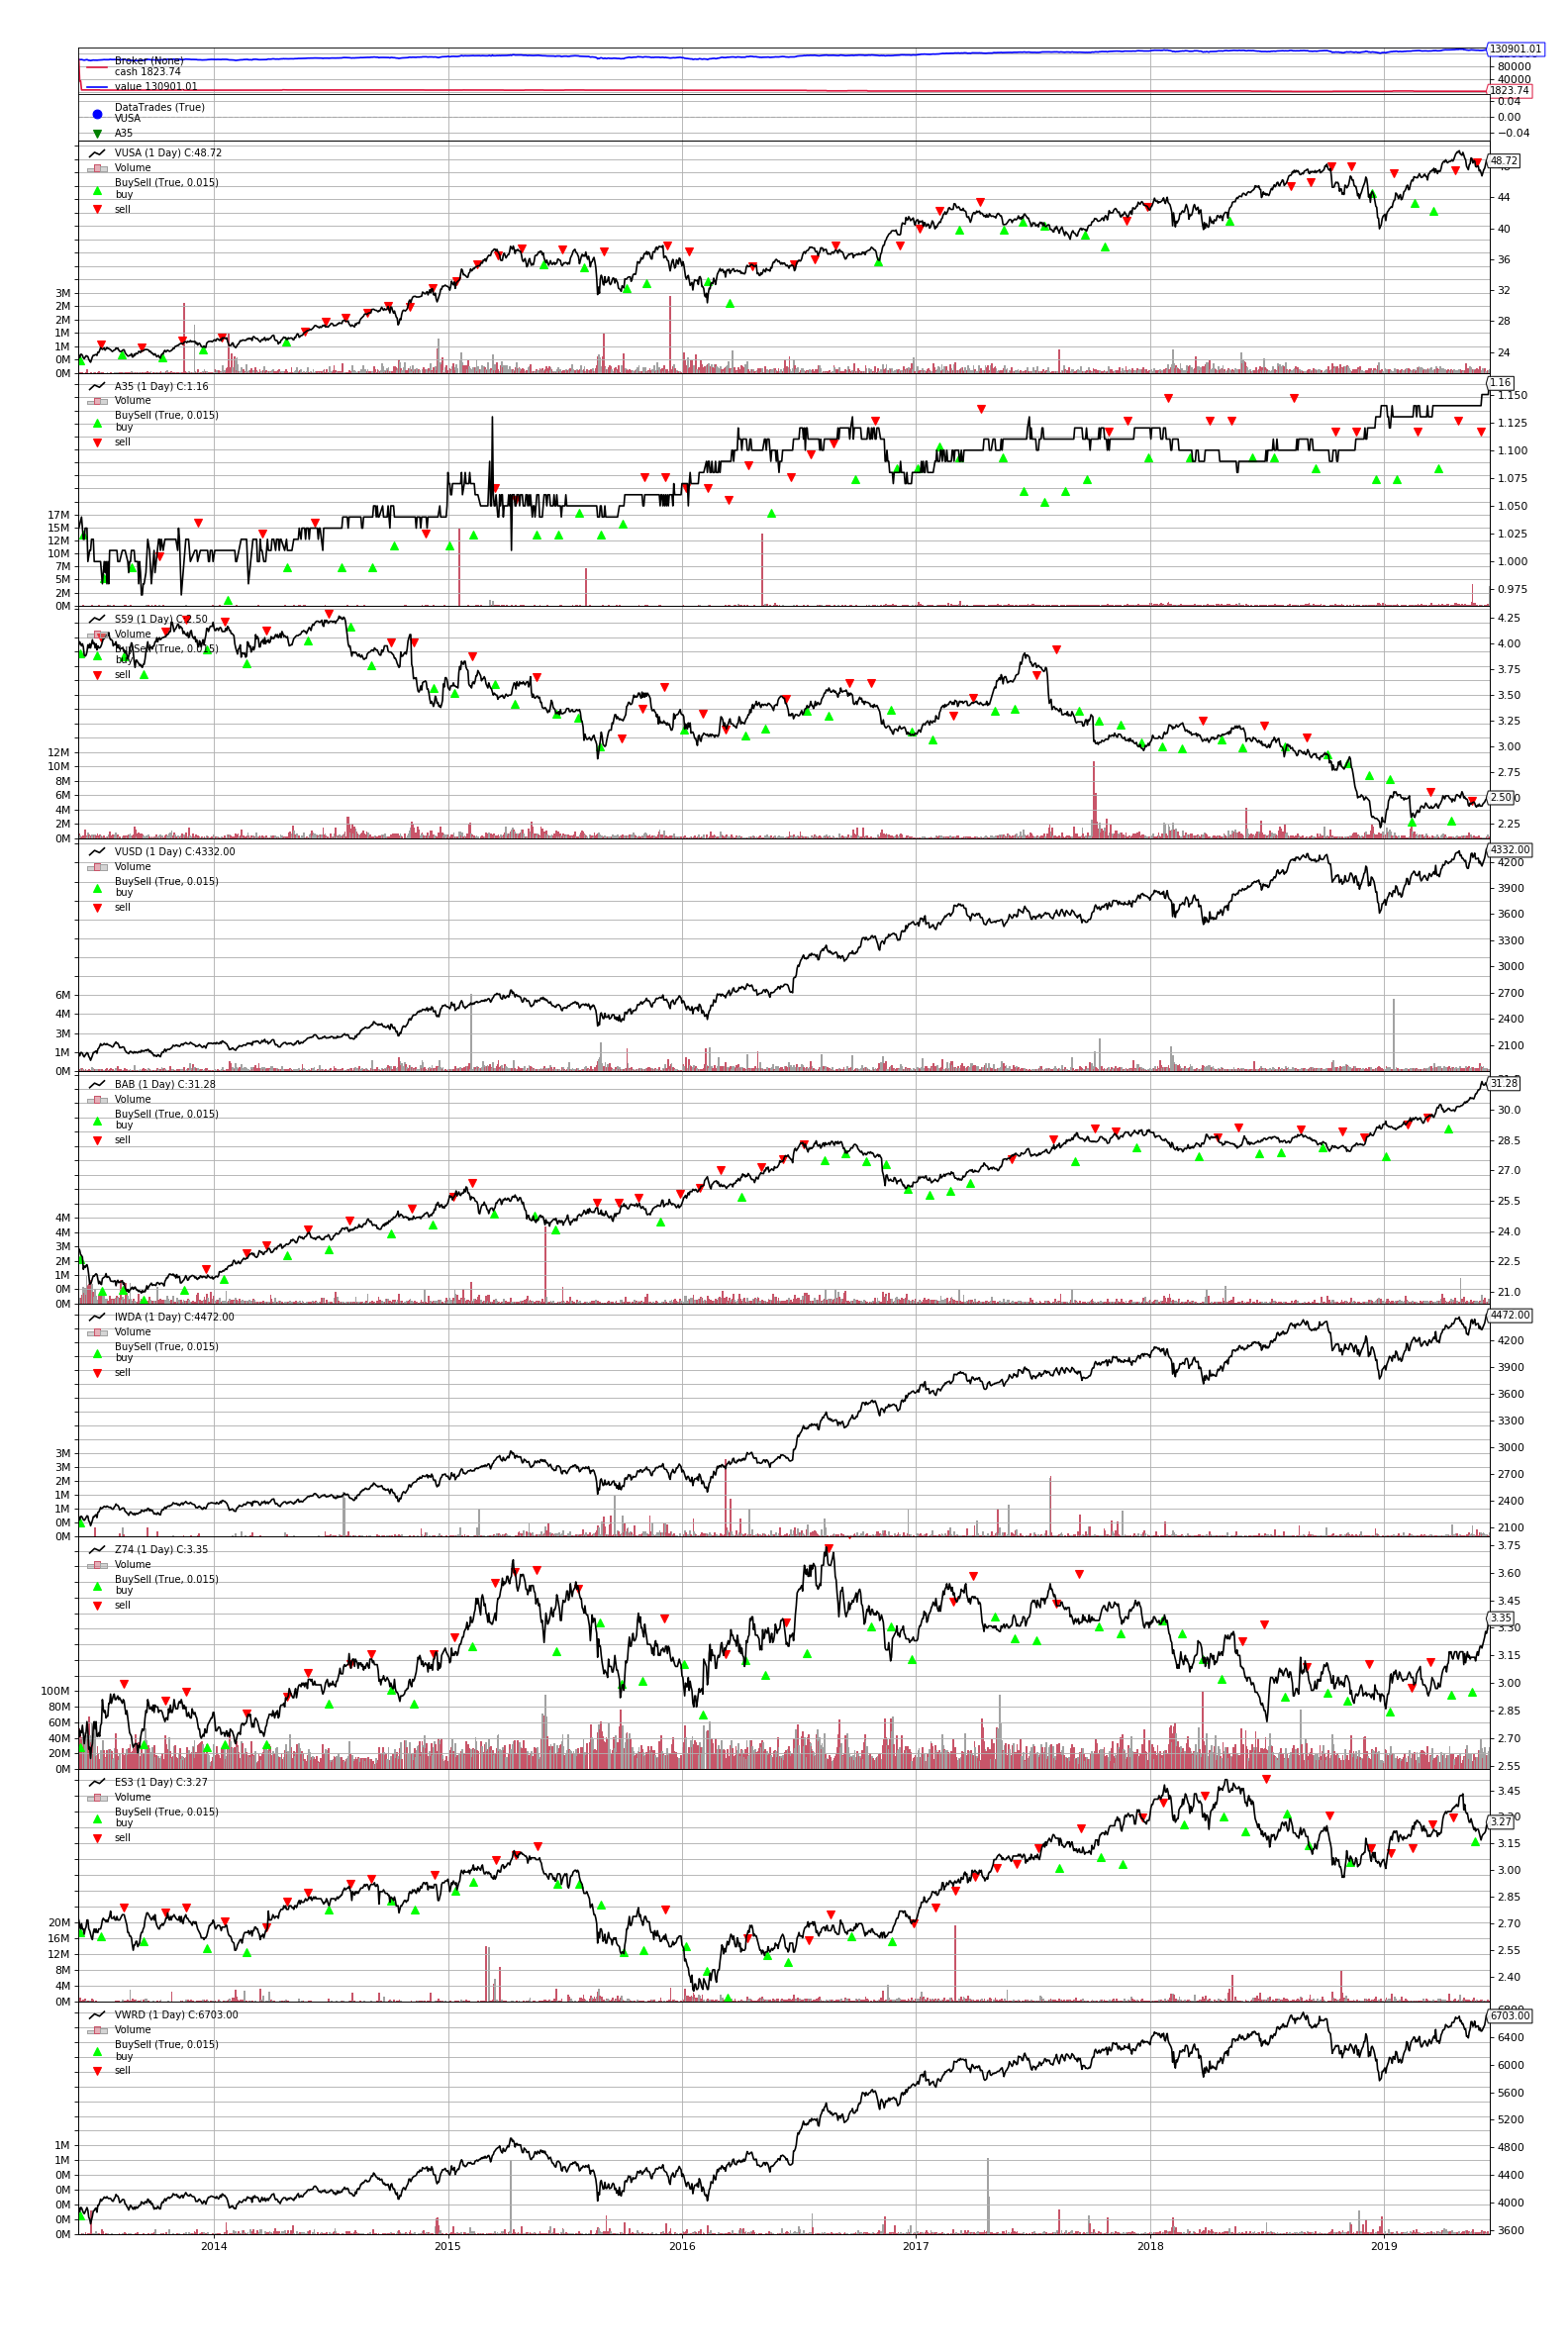

[[<Figure size 1440x2160 with 20 Axes>]]

<IPython.core.display.Javascript object>

In [93]:
# plt.rcParams["figure.dpi"] = 72
plt.rcParams["figure.figsize"] = 20, 30

bokehPlotter = Bokeh(style="bar", plot_mode="tabs")
cerebro.plot()